# Visualization and Exploratory Analysis

## Overview

Here's a brief sketch of the plotting landscape as of November 2018.
For some reason, plotting tools feel a bit more personal than other parts of this series so far, so I feel the need to blanket this who discussion in a caveat: this is my personal take, shaped by my personal background and tastes.
Also, I'm not at all an expert on visualization, just a consumer.
For real advice, you should [listen](http://twitter.com/mbostock) to the [experts](https://twitter.com/oceankidbilly) in this [area](https://twitter.com/arnicas).
Take this all with an extra grain or two of salt.

## [Matplotlib](http://matplotlib.org/)

Matplotlib is an amazing project, and is the foundation of pandas' built-in plotting and Seaborn.
It handles everything from the integration with various drawing backends, to several APIs handling drawing charts or adding and transforming individual glyphs (artists).
I've found knowing the [pyplot API](http://matplotlib.org/api/pyplot_api.html) useful.
You're less likely to need things like [Transforms](http://matplotlib.org/users/transforms_tutorial.html) or [artists](http://matplotlib.org/api/artist_api.html), but when you do the documentation is there.

Matplotlib has built up something of a bad reputation for being verbose.
I think that complaint is valid, but misplaced.
Matplotlib lets you control essentially anything on the figure.
An overly-verbose API just means there's an opportunity for a higher-level, domain specific, package to exist (like seaborn for statistical graphics).

## [Pandas' builtin-plotting](http://pandas.pydata.org/pandas-docs/version/0.18.0/visualization.html)

`DataFrame` and `Series` have a `.plot` namespace, with various chart types available (`line`, `hist`, `scatter`, etc.).
Pandas objects provide additional metadata that can be used to enhance plots (the Index for a better automatic x-axis then `range(n)` or Index names as axis labels for example).

And since pandas had fewer backwards-compatibility constraints, it had a bit better default aesthetics.
The [matplotlib 2.0 release](http://matplotlib.org/style_changes.html) will level this, and pandas has [deprecated its custom plotting styles](https://github.com/pydata/pandas/issues/11783), in favor of matplotlib's (technically [I just broke](https://github.com/pydata/pandas/issues/11727) it when fixing matplotlib 1.5 compatibility, so we deprecated it after the fact).

At this point, I see pandas `DataFrame.plot` as a useful exploratory tool for quick throwaway plots.

## [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/)

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/), created by Michael Waskom, "provides a high-level interface for drawing attractive statistical graphics." Seaborn gives a great API for quickly exploring different visual representations of your data. We'll be focusing on that today

## [Plotly](https://plot.ly/python/)

[Plotly](https://plot.ly/python/) is an open source plotting library for creating interactive plots for web browsers.

Plotly is different from the plotting libraries above as they Plotly is completely independent from matplotlib and focused more on producing a plot as an html file for use in an online website or application. It is also not specific to Python. They also have libraries for Matlab, R, and JavaScript.

## Examples

I do want to pause and explain the type of work I'm doing with these packages.
The vast majority of plots I create are for exploratory analysis, helping me understand the dataset I'm working with.
They aren't intended for the client (whoever that is) to see.
Occasionally that exploratory plot will evolve towards a final product that will be used to explain things to the client.
In this case I'll either polish the exploratory plot, or rewrite it in another system more suitable for the final product (in D3 or Bokeh, say, if it needs to be an interactive document in the browser).

Now that we have a feel for the overall landscape (from my point of view), let's delve into a few examples.
We'll use the `diamonds` dataset from ggplot2.
You could use Vincent Arelbundock's [RDatasets package](https://github.com/vincentarelbundock/Rdatasets) to find it (`pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv')`).

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv', index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


It's not clear to me where the scientific community will come down on Bokeh for exploratory analysis.
The ability to share interactive graphics is compelling.
The trend towards more and more analysis and communication happening in the browser will only enhance this feature of Bokeh.

Personally though, I have a lot of inertia behind matplotlib so I haven't switched to Bokeh for day-to-day exploratory analysis.

I have greatly enjoyed Bokeh for building dashboards and [webapps](http://bokeh.pydata.org/en/latest/docs/user_guide/interaction.html) with Bokeh server.
It's still young, and I've hit [some rough edges](http://stackoverflow.com/questions/36610328/control-bokeh-plot-state-with-http-request), but I'm happy to put up with some awkwardness to avoid writing more javascript.

In [5]:
sns.set(context='talk', style='ticks')

%matplotlib inline

## Matplotlib

Since it's relatively new, I should point out that matplotlib 1.5 added support for plotting labeled data.

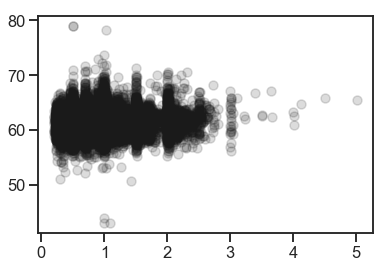

In [6]:
fig, ax = plt.subplots()

ax.scatter(x='carat', y='depth', data=df, c='k', alpha=.15);

This isn't limited to just `DataFrame`s.
It supports anything that uses `__getitem__` (square-brackets) with string keys.
Other than that, I don't have much to add to the [matplotlib documentation](http://matplotlib.org/).

## Pandas Built-in Plotting

The metadata in DataFrames gives a bit better defaults on plots.

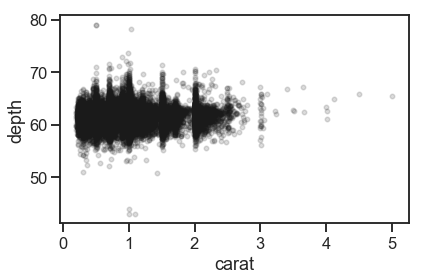

In [7]:
df.plot.scatter(x='carat', y='depth', c='k', alpha=.15)
plt.tight_layout()

We get axis labels from the column names.
Nothing major, just nice.

Pandas can be more convenient for plotting a bunch of columns with a shared x-axis (the index), say several timeseries.

## Seaborn

The rest of this post will focus on seaborn, and why I think it's especially great for exploratory analysis.

I would encourage you to read Seaborn's [introductory notes](https://stanford.edu/~mwaskom/software/seaborn/introduction.html#introduction), which describe its design philosophy and attempted goals. Some highlights:

> Seaborn aims to make visualization a central part of exploring and understanding data.

It does this through a consistent, understandable (to me anyway) API.

> The plotting functions try to do something useful when called with a minimal set of arguments, and they expose a number of customizable options through additional parameters.
 
Which works great for exploratory analysis, with the option to turn that into something more polished if it looks promising.

> Some of the functions plot directly into a matplotlib axes object, while others operate on an entire figure and produce plots with several panels.

The fact that seaborn is built on matplotlib means that if you are familiar with the pyplot API, your knowledge will still be useful.

Most seaborn plotting functions (one per chart-type) take an `x`, `y`, `hue`, and `data` arguments (only some are required, depending on the plot type). If you're working with DataFrames, you'll pass in strings referring to column names, and the DataFrame for `data`.

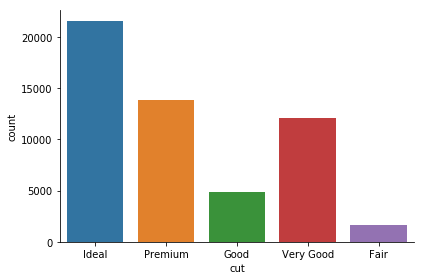

In [3]:
sns.countplot(x='cut', data=df)
sns.despine()
plt.tight_layout()

E:\programs\anaconda3_64bit\envs\hydrosoc-2018\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


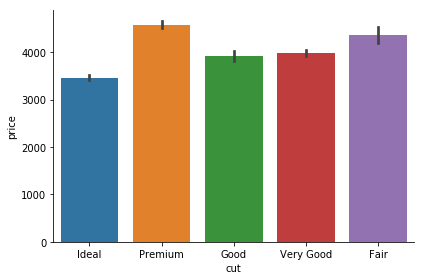

In [4]:
sns.barplot(x='cut', y='price', data=df)
sns.despine()
plt.tight_layout()

Bivariate relationships can easily be explored, either one at a time:

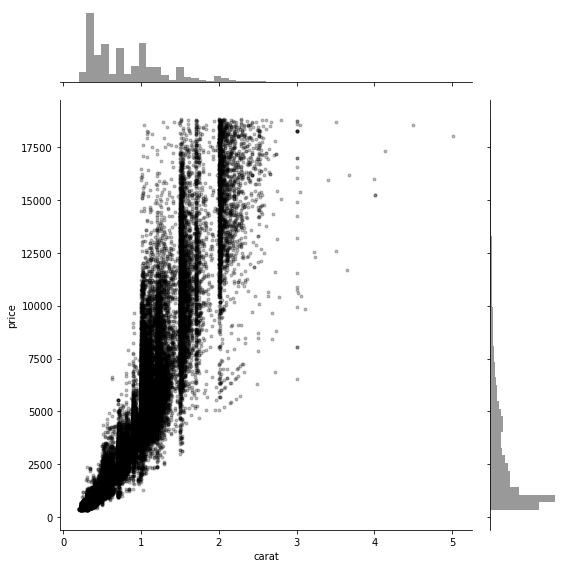

In [5]:
sns.jointplot(x='carat', y='price', data=df, height=8, alpha=.25,
              color='k', marker='.')
plt.tight_layout()

Or many at once

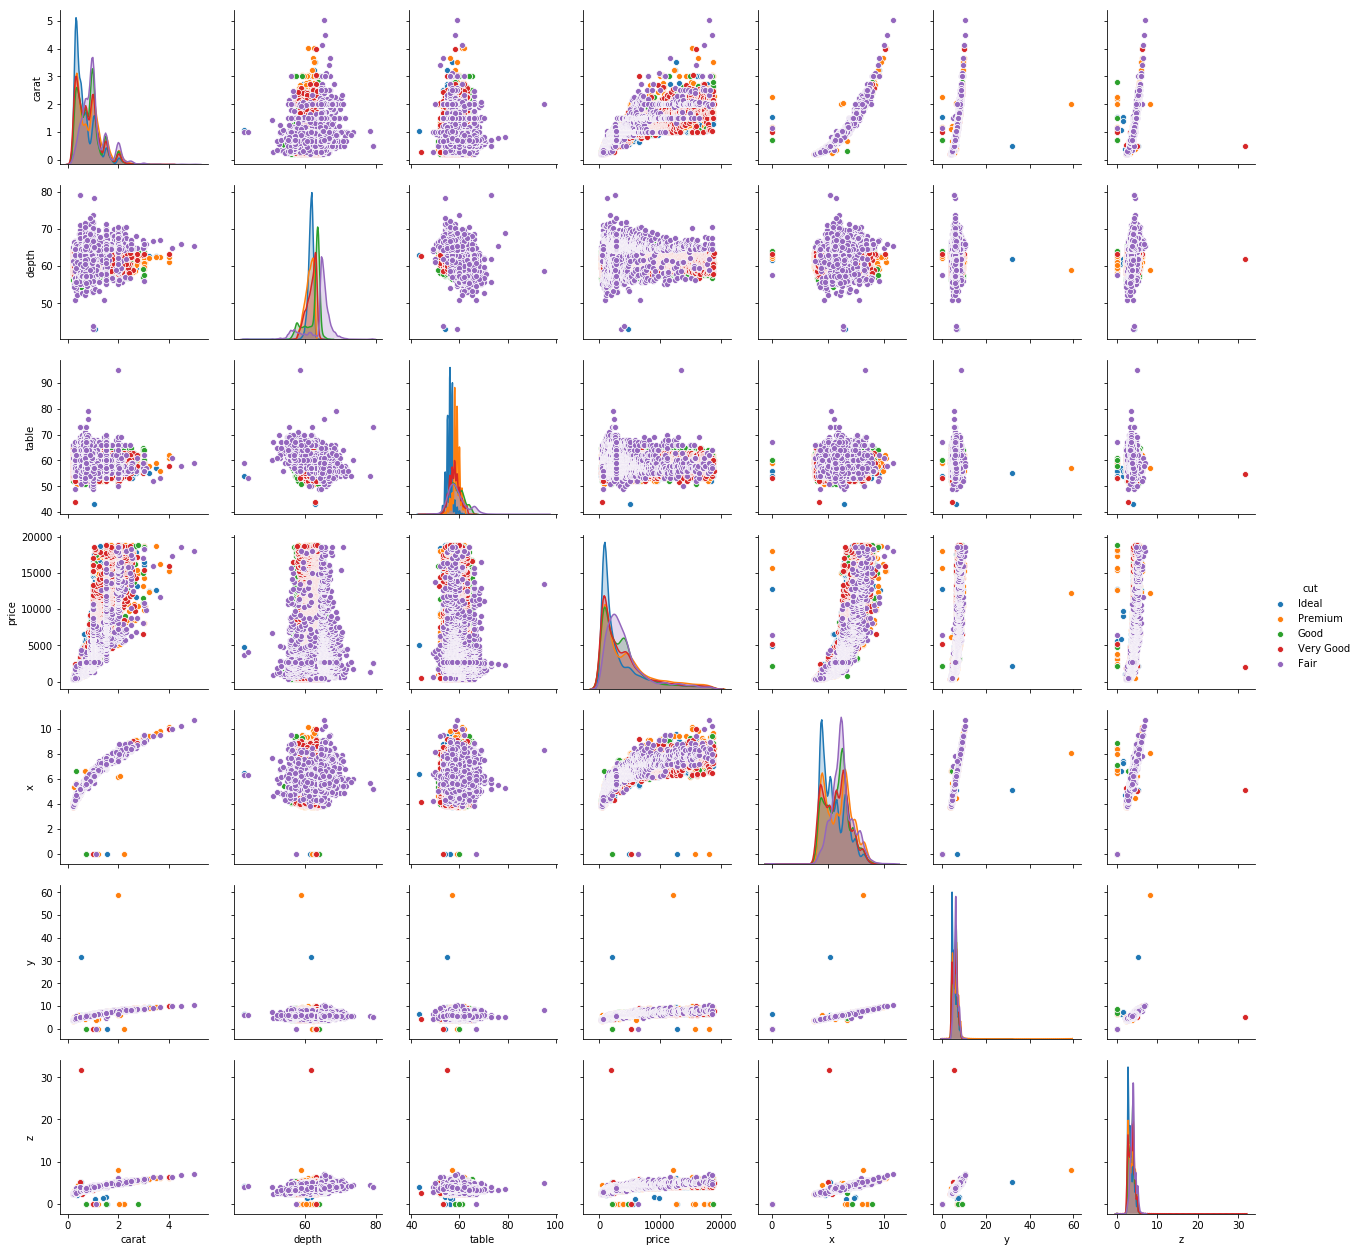

In [6]:
g = sns.pairplot(df, hue='cut')

`pairplot` is a convenience wrapper around `PairGrid`, and offers our first look at an important seaborn abstraction, the `Grid`. *Seaborn `Grid`s provide a link between a matplotlib `Figure` with multiple `axes` and features in your dataset.*

There are two main ways of interacting with grids. First, seaborn provides convenience-wrapper functions like `pairplot`, that have good defaults for common tasks. If you need more flexibility, you can work with the `Grid` directly by mapping plotting functions over each axes.

In [7]:
def core(df, α=.05):
    mask = (df > df.quantile(α)).all(1) & (df < df.quantile(1 - α)).all(1)
    return df[mask]

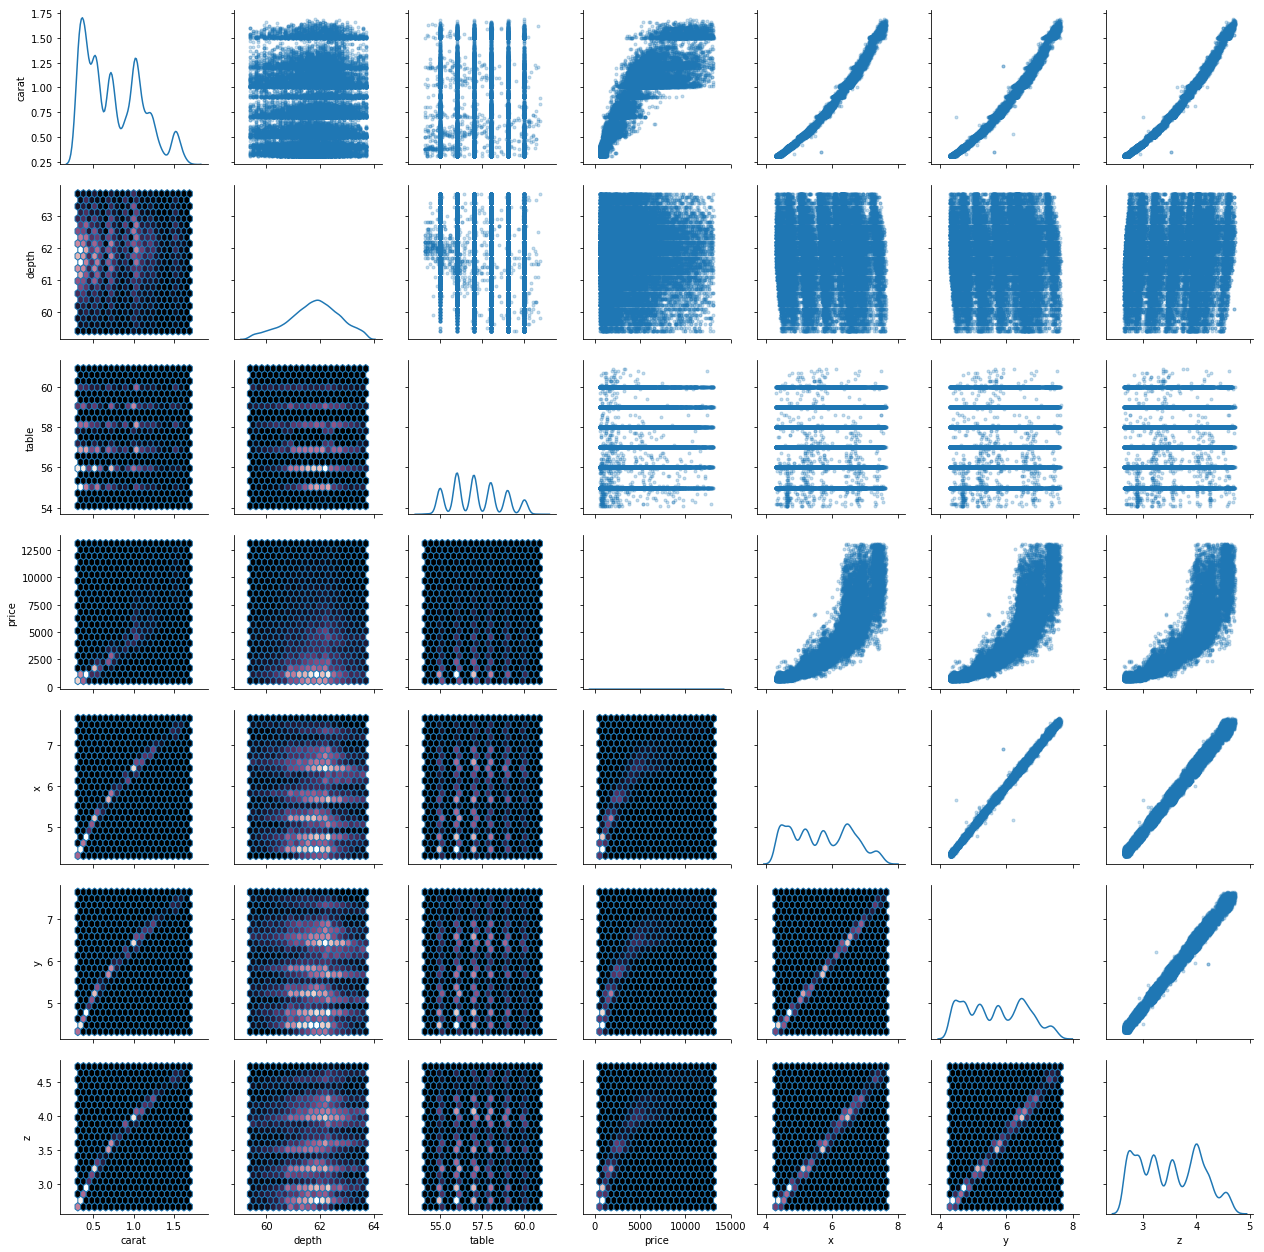

In [8]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

(df.select_dtypes(include=[np.number])
   .pipe(core)
   .pipe(sns.PairGrid)
   .map_upper(plt.scatter, marker='.', alpha=.25)
   .map_diag(sns.kdeplot)
   .map_lower(plt.hexbin, cmap=cmap, gridsize=20)
);

This last example shows the tight integration with matplotlib. `g.axes` is an array of `matplotlib.Axes` and `g.fig` is a `matplotlib.Figure`.
This is a pretty common pattern when using seaborn: use a seaborn plotting method (or grid) to get a good start, and then adjust with matplotlib as needed.

I *think* (not an expert on this at all) that one thing people like about the grammar of graphics is its flexibility.
You aren't limited to a fixed set of chart types defined by the library author.
Instead, you construct your chart by layering scales, aesthetics and geometries.
And using `ggplot2` in R is a delight.

That said, I wouldn't really call what seaborn / matplotlib offer that limited.
You can create pretty complex charts suited to your needs.

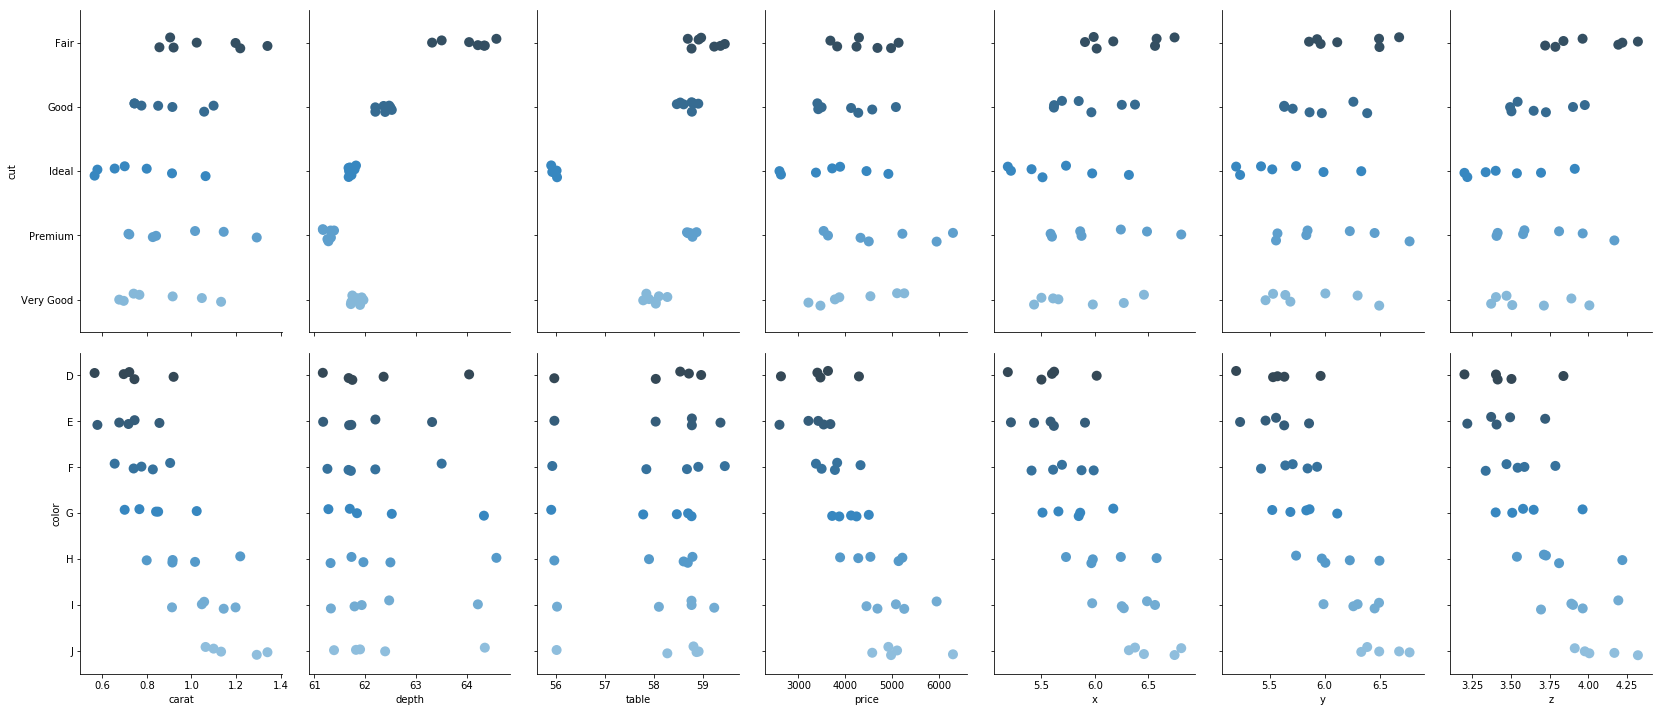

In [12]:
agged = df.groupby(['cut', 'color']).mean().sort_index().reset_index()

g = sns.PairGrid(agged, x_vars=agged.columns[2:], y_vars=['cut', 'color'],
                 height=5, aspect=.65)
g.map(sns.stripplot, orient="h", size=10, palette='Blues_d')

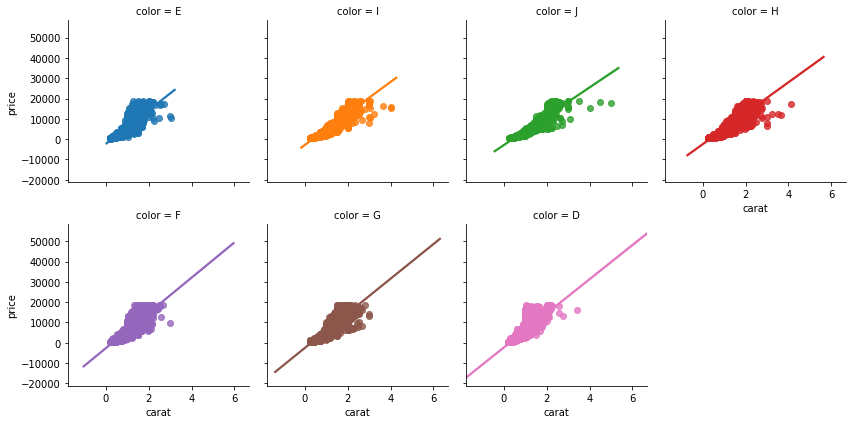

In [10]:
g = sns.FacetGrid(df, col='color', hue='color', col_wrap=4)
g.map(sns.regplot, 'carat', 'price')

Initially I had many more examples showing off seaborn, but I'll spare you.
Seaborn's [documentation](https://stanford.edu/~mwaskom/software/seaborn/) is thorough (and just beautiful to look at).

We'll end with a nice scikit-learn integration for exploring the parameter-space on a GridSearch object.

Thanks for reading!
I want to reiterate at the end that this is just *my* way of doing data visualization.
Your needs might differ, meaning you might need different tools.
You can still use pandas to get it to the point where it's ready to be visualized!

As always, [feedback is welcome](https://twitter.com/tomaugspurger).